In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

pd.options.display.max_rows = 100

In [2]:
import wrangle_zillow as w
import explore as e

In [3]:
df = w.acquire_zillow()

Using cached csv


In [4]:
df.shape

(77380, 68)

In [5]:
train, validate, test = w.prepare_zillow(df)

In [6]:
train.shape, validate.shape, test.shape

((38192, 16), (16368, 16), (13640, 16))

In [7]:
38192 + 16368 + 13640

68200

In [8]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,fips_06037,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency
44785,2.0,4.0,1430.0,0.0,33656927.0,-117951898.0,96964,0.0,0.262900,49,0,1,0,0,0,0
16267,3.0,5.0,2625.0,0.0,34302964.0,-118506606.0,96370,0.0,-0.045759,52,1,0,0,0,1,0
24208,2.5,3.0,1109.0,0.0,33655478.0,-117684439.0,96962,1.0,-0.011548,28,0,1,0,0,0,0
40323,3.0,3.0,1732.0,0.0,34569171.0,-118065585.0,97328,0.0,-0.041808,33,1,0,0,0,0,0
71569,1.0,2.0,808.0,0.0,33896400.0,-118253813.0,96090,0.0,-0.090481,66,1,0,0,0,0,0


In [9]:
import explore as e

In [10]:
conts = ['bathrooms', 'bedrooms', 'squarefeet', 'num_fireplace', 'threequarter_baths', 'age']
target = 'logerror'
train_pos = train[train.logerror >= 0]
train_neg = train[train.logerror < 0]

## Question: How do our continuous variables align with our (cont) target variable? 
### Is there a linear relationship? (pearsonr)

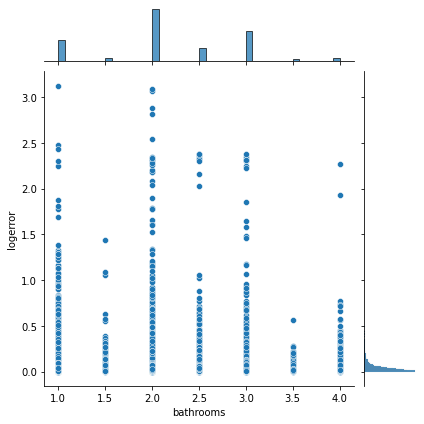

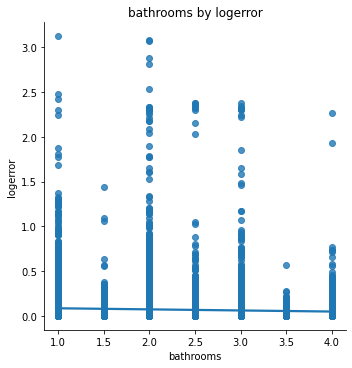

H0: There is no linear relationship between bathrooms and logerror.
HA: There is a linear relationship between bathrooms and logerror.
----------------------------------------------------------------
p-value: 1.1594987199400326e-16

With a p-value below our established alpha we reject the null hypothesis.


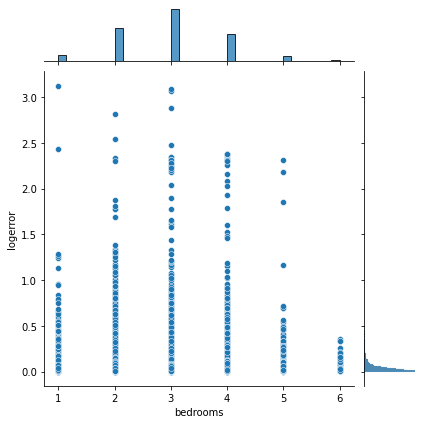

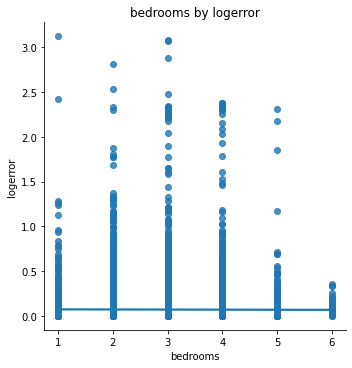

H0: There is no linear relationship between bedrooms and logerror.
HA: There is a linear relationship between bedrooms and logerror.
----------------------------------------------------------------
We fail to reject the null hypothesis.


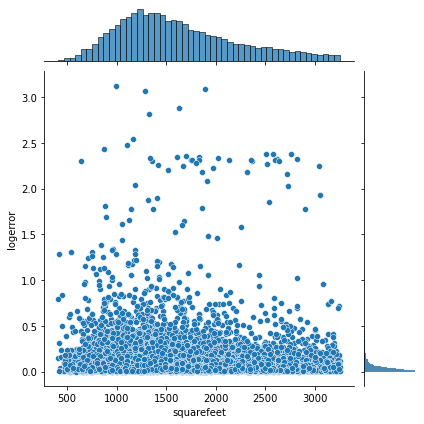

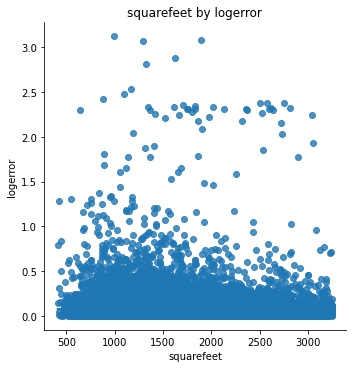

H0: There is no linear relationship between squarefeet and logerror.
HA: There is a linear relationship between squarefeet and logerror.
----------------------------------------------------------------
p-value: 0.008657172288263792

With a p-value below our established alpha we reject the null hypothesis.


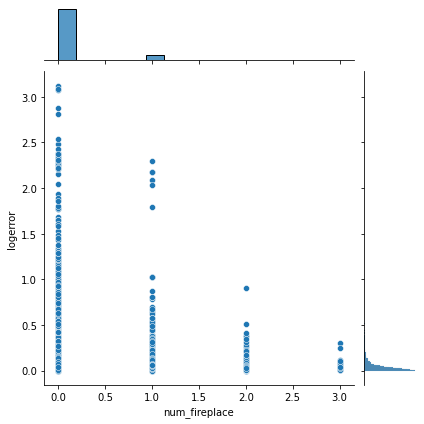

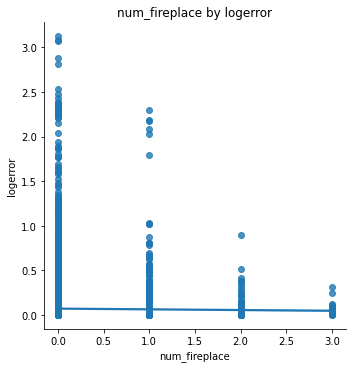

H0: There is no linear relationship between num_fireplace and logerror.
HA: There is a linear relationship between num_fireplace and logerror.
----------------------------------------------------------------
p-value: 0.005404688835096297

With a p-value below our established alpha we reject the null hypothesis.


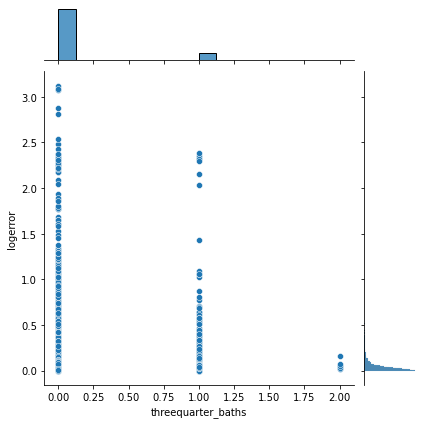

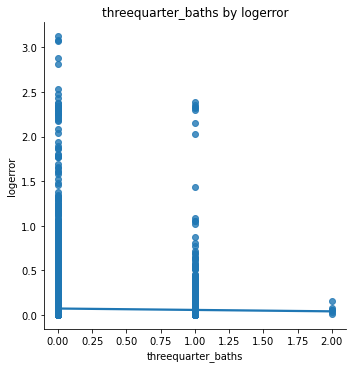

H0: There is no linear relationship between threequarter_baths and logerror.
HA: There is a linear relationship between threequarter_baths and logerror.
----------------------------------------------------------------
p-value: 6.04775083275726e-07

With a p-value below our established alpha we reject the null hypothesis.


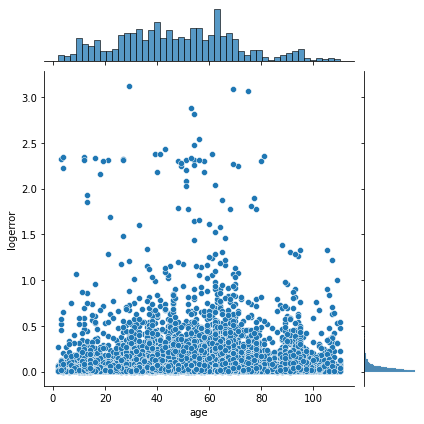

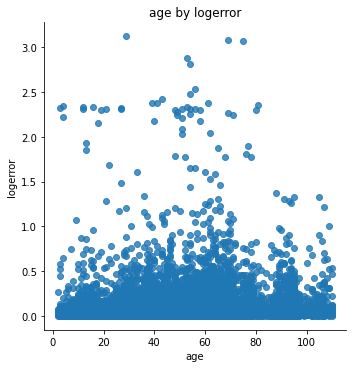

H0: There is no linear relationship between age and logerror.
HA: There is a linear relationship between age and logerror.
----------------------------------------------------------------
p-value: 1.8636961591025224e-43

With a p-value below our established alpha we reject the null hypothesis.


In [11]:
e.linear_tests(train_pos, conts, target)

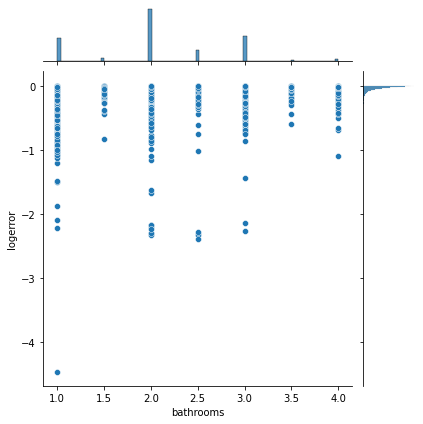

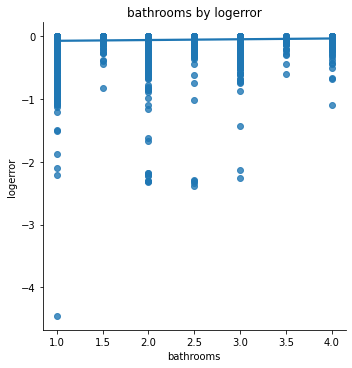

H0: There is no linear relationship between bathrooms and logerror.
HA: There is a linear relationship between bathrooms and logerror.
----------------------------------------------------------------
p-value: 1.7883300661804393e-22

With a p-value below our established alpha we reject the null hypothesis.


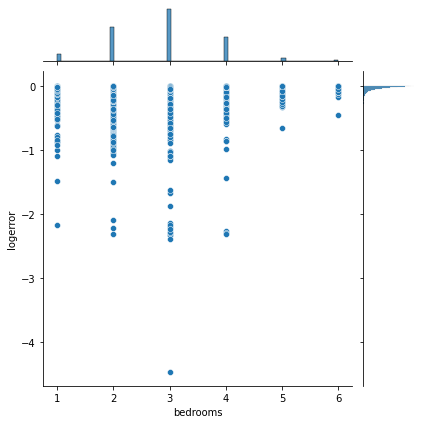

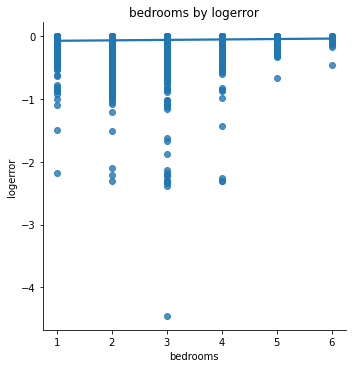

H0: There is no linear relationship between bedrooms and logerror.
HA: There is a linear relationship between bedrooms and logerror.
----------------------------------------------------------------
p-value: 4.468203380517155e-12

With a p-value below our established alpha we reject the null hypothesis.


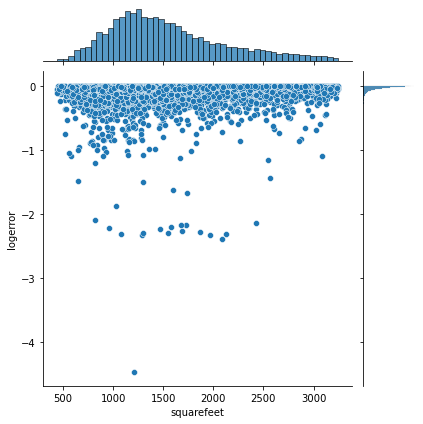

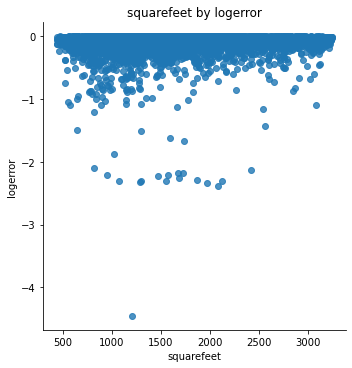

H0: There is no linear relationship between squarefeet and logerror.
HA: There is a linear relationship between squarefeet and logerror.
----------------------------------------------------------------
p-value: 0.004963858479136602

With a p-value below our established alpha we reject the null hypothesis.


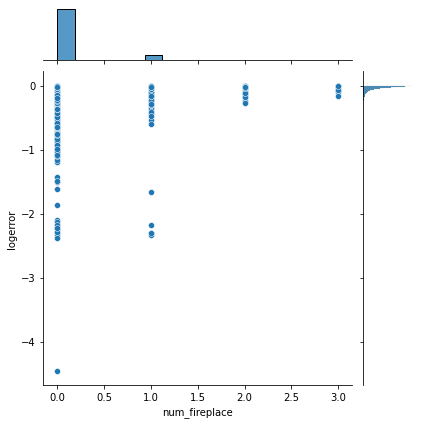

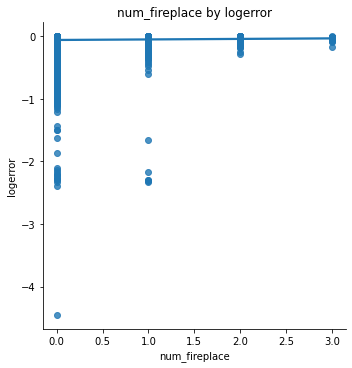

H0: There is no linear relationship between num_fireplace and logerror.
HA: There is a linear relationship between num_fireplace and logerror.
----------------------------------------------------------------
p-value: 0.0006947274290749039

With a p-value below our established alpha we reject the null hypothesis.


In [ ]:
e.linear_tests(train_neg, conts, target)

## Question: How do our categorical variables interact with our target? 

In [ ]:
cats = ['tax_delinquency', 'has_pool', 'hottub_or_spa', 'fips_06111', 'fips_06059', 'fips_06037']

In [ ]:
e.cat_visuals(train_pos, cats, target)

In [ ]:
# Let's do an t-test to see if the mean logerror changes between the fips
train.logerror.hist()

In [ ]:
from scipy import stats
def run_ttest(subset):
    a = .05
    print(f'H0: The mean of log error for all houses is equal to the mean log error of selected subset.')
    print(f'HA: The mean of log error for all houses is not equal to the mean log error of selected subset.\n')
    t, p = stats.ttest_1samp(subset.logerror, overall_logerror_mean)
    print(f't value: {t}, p value: {p}\n')
    if p < a:
        print('Because p value is less than alpha we can reject the null hypothesis.\n')
    else:
        print('We fail to reject the null hypothesis.\n')


overall_logerror_mean = train.logerror.mean()
train.groupby('fips_06111').apply(run_ttest)

In [ ]:
train.groupby('fips_06059').apply(run_ttest)

In [ ]:
train.groupby('fips_06037').apply(run_ttest)

In [ ]:
# For pool, there is a statistical significance in the means not being equal (between logerror)
train.groupby('has_pool').apply(run_ttest)

In [ ]:
train.groupby('hottub_or_spa').apply(run_ttest)

In [ ]:
# There is statistical significance with tax delinquency (1)
train.groupby('tax_delinquency').apply(run_ttest)

In [ ]:
e.heatmap_zillow(train)

In [ ]:
e.heatmap_zillow(train_pos)

In [ ]:
e.heatmap_zillow(train_neg)

In [ ]:
# The only variable that seems to indicate any (small at that) correlation is age with our target of logerror.

### Prior to clustering we need to scale the data:

In [ ]:
quants = ['bathrooms', 'bedrooms', 'squarefeet', 'num_fireplace', 'latitude',
          'longitude', 'threequarter_baths', 'age']

In [37]:
train, validate, test = e.scale_zillow(train, validate, test, quants)

NameError: name 'MinMaxScaler' is not defined

## Can we obtain a useful cluster from our lat, long, or zipcodes?

In [19]:
col1 = ['latitude', 'longitude']
col2 = ['regionidzip']
col3 = ['latitude', 'longitude', 'regionidzip']

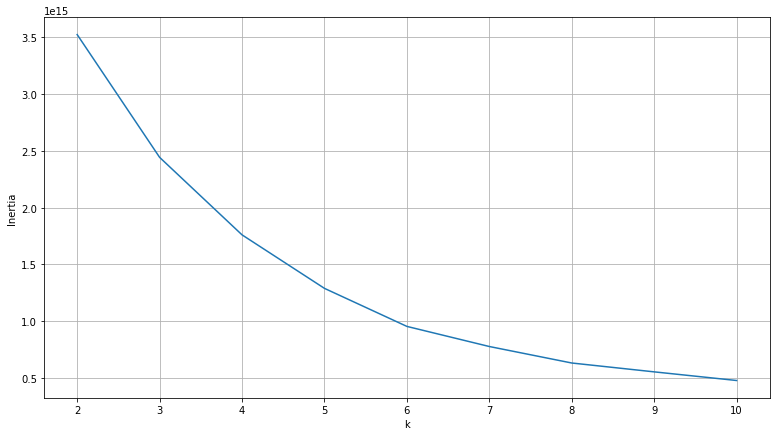

In [20]:
X = train[col1]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [21]:
# For lat/long looks like k of 6

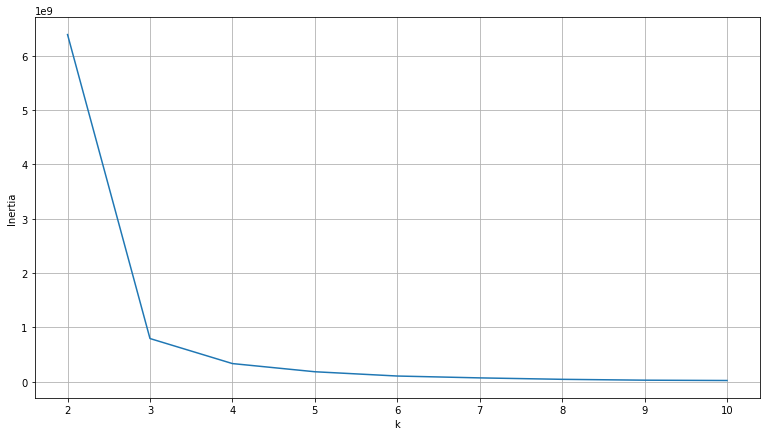

In [22]:
X = train[col2]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [23]:
# k of 3 for zipcode

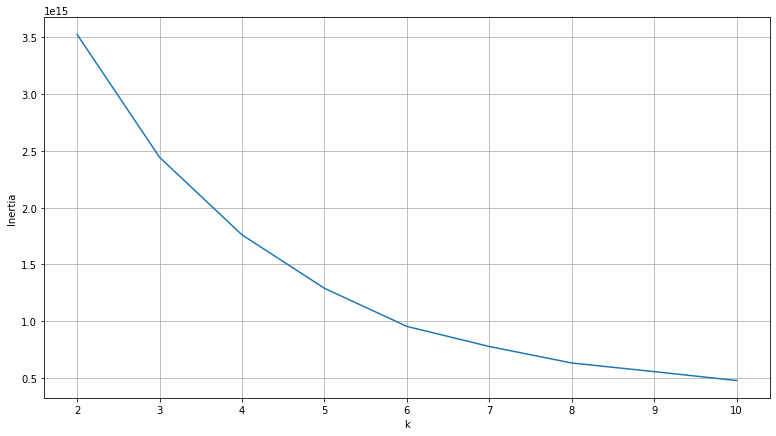

In [24]:
X = train[col3]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [25]:
# k of 6 for lat/long/zip

In [26]:
x = train[col1]
kmeans = KMeans(n_clusters=6).fit(x)

train['cluster_lat_long'] = kmeans.predict(x)

train.cluster_lat_long = train.cluster_lat_long.astype('category')

In [27]:
centroid1 = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroid1

,latitude,longitude
0,3.462600e+07,-1.181225e+08
1,3.397502e+07,-1.182867e+08
2,3.393946e+07,-1.179574e+08
3,3.422999e+07,-1.190332e+08
4,3.424827e+07,-1.185099e+08
5,3.364095e+07,-1.177623e+08


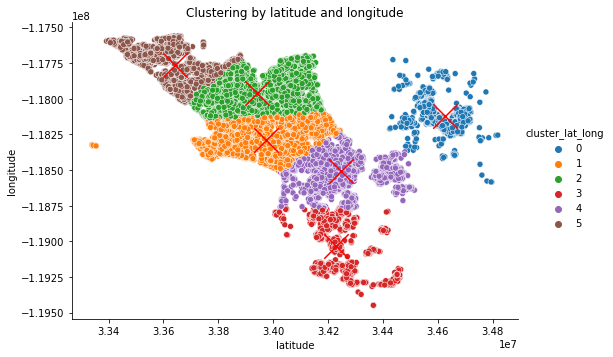

In [28]:
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_lat_long', aspect=1.5)
plt.title('Clustering by latitude and longitude')
plt.scatter(centroid1.latitude, centroid1.longitude, marker='x', s=600, c='red')

In [29]:
x = train[col2]
kmeans = KMeans(n_clusters=3).fit(x)

train['cluster_zip'] = kmeans.predict(x)

train.cluster_zip = train.cluster_zip.astype('category')

In [30]:
centroid2 = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroid2

,regionidzip
0,96263.844226
1,399675.000000
2,97061.081197


In [31]:
x = train[col3]
kmeans = KMeans(n_clusters=6).fit(x)

train['cluster_lat_long_zip'] = kmeans.predict(x)

train.cluster_lat_long_zip = train.cluster_lat_long_zip.astype('category')

In [32]:
centroid3 = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroid3

,latitude,longitude,regionidzip
0,3.394560e+07,-1.179653e+08,96622.973287
1,3.364609e+07,-1.177655e+08,96985.134446
2,3.423000e+07,-1.190324e+08,96877.631674
3,3.424938e+07,-1.185089e+08,96411.916785
4,3.397313e+07,-1.182933e+08,96134.206368
5,3.462600e+07,-1.181225e+08,97313.896714


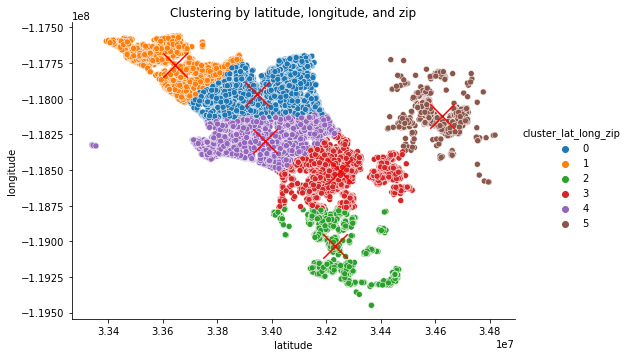

In [33]:
sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_lat_long_zip', aspect=1.5)
plt.title('Clustering by latitude, longitude, and zip')
plt.scatter(centroid3.latitude, centroid3.longitude, marker='x', s=600, c='red')

## Can we obtain useful clusters from our other variables?

In [34]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,fips_06037,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency,cluster_lat_long,cluster_zip,cluster_lat_long_zip
44785,2.0,4.0,1430.0,0.0,33656927.0,-117951898.0,96964,0.0,0.262900,49,0,1,0,0,0,0,5,2,1
16267,3.0,5.0,2625.0,0.0,34302964.0,-118506606.0,96370,0.0,-0.045759,52,1,0,0,0,1,0,4,0,3
24208,2.5,3.0,1109.0,0.0,33655478.0,-117684439.0,96962,1.0,-0.011548,28,0,1,0,0,0,0,5,2,1
40323,3.0,3.0,1732.0,0.0,34569171.0,-118065585.0,97328,0.0,-0.041808,33,1,0,0,0,0,0,0,2,5
71569,1.0,2.0,808.0,0.0,33896400.0,-118253813.0,96090,0.0,-0.090481,66,1,0,0,0,0,0,1,0,4


In [35]:
## this needs scaled before clustering
col4 = ['bathrooms', 'bedrooms', 'squarefeet', 'age']
col5 = ['age', 'latitude', 'longitude']

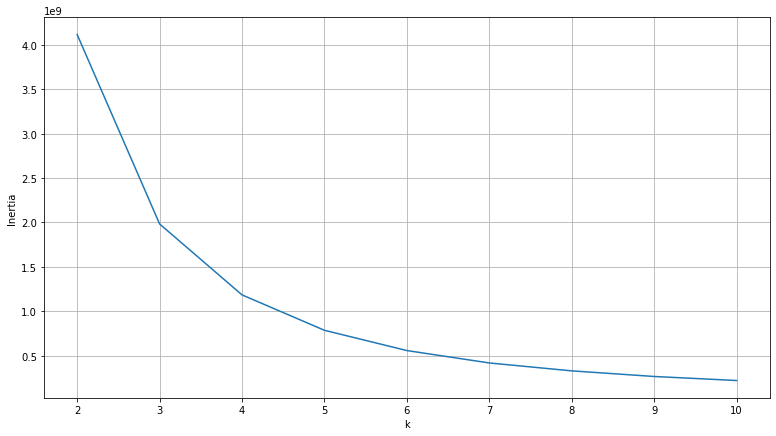

In [36]:
X = train[col4]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

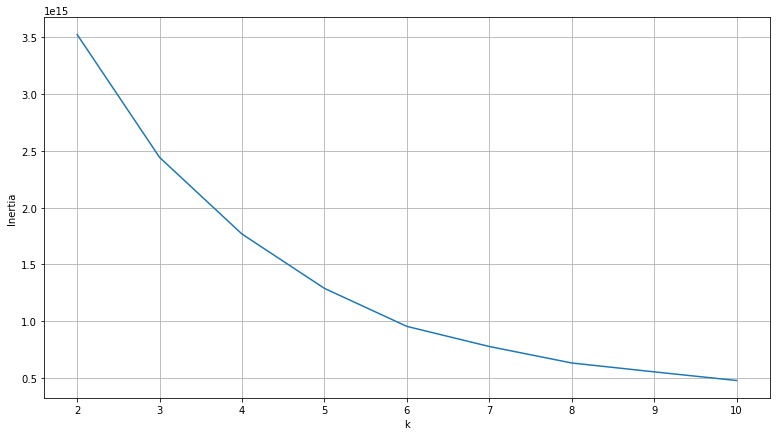

In [37]:
X = train[col5]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [38]:
x = train[col4]
kmeans = KMeans(n_clusters=3).fit(x)

train['cluster_conts'] = kmeans.predict(x)

train.cluster_conts = train.cluster_conts.astype('category')

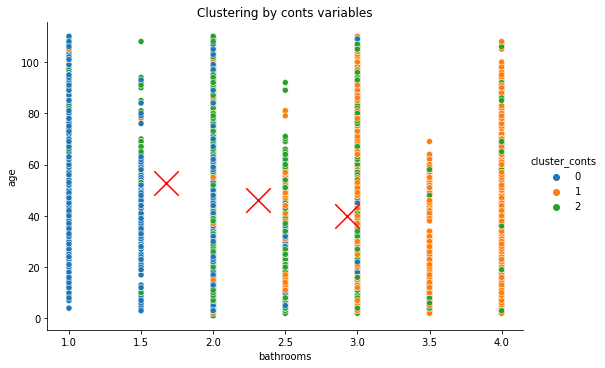

In [39]:
centroid4 = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroid4

sns.relplot(data=train, x='bathrooms', y='age', hue='cluster_conts', aspect=1.5)
plt.title('Clustering by conts variables')
plt.scatter(centroid4.bathrooms, centroid4.age, marker='x', s=600, c='red')

In [40]:
x = train[col5]
kmeans = KMeans(n_clusters=6).fit(x)

train['cluster_lat_long_age'] = kmeans.predict(x)

train.cluster_lat_long_age = train.cluster_lat_long_age.astype('category')

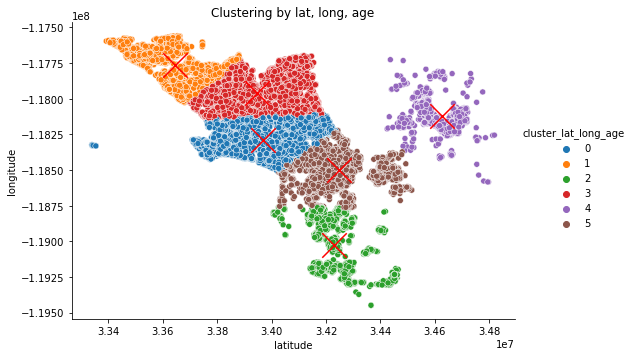

In [41]:
centroid5 = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroid5

sns.relplot(data=train, x='latitude', y='longitude', hue='cluster_lat_long_age', aspect=1.5)
plt.title('Clustering by lat, long, age')
plt.scatter(centroid5.latitude, centroid5.longitude, marker='x', s=600, c='red')

In [42]:
train.isnull().sum()

bathrooms               0
bedrooms                0
squarefeet              0
num_fireplace           0
latitude                0
longitude               0
regionidzip             0
threequarter_baths      0
logerror                0
age                     0
fips_06037              0
fips_06059              0
fips_06111              0
hottub_or_spa           0
has_pool                0
tax_delinquency         0
cluster_lat_long        0
cluster_zip             0
cluster_lat_long_zip    0
cluster_conts           0
cluster_lat_long_age    0
dtype: int64

In [43]:
train.head()

,bathrooms,bedrooms,squarefeet,num_fireplace,latitude,longitude,regionidzip,threequarter_baths,logerror,age,...,fips_06059,fips_06111,hottub_or_spa,has_pool,tax_delinquency,cluster_lat_long,cluster_zip,cluster_lat_long_zip,cluster_conts,cluster_lat_long_age
44785,2.0,4.0,1430.0,0.0,33656927.0,-117951898.0,96964,0.0,0.262900,49,...,1,0,0,0,0,5,2,1,2,1
16267,3.0,5.0,2625.0,0.0,34302964.0,-118506606.0,96370,0.0,-0.045759,52,...,0,0,0,1,0,4,0,3,1,5
24208,2.5,3.0,1109.0,0.0,33655478.0,-117684439.0,96962,1.0,-0.011548,28,...,1,0,0,0,0,5,2,1,0,1
40323,3.0,3.0,1732.0,0.0,34569171.0,-118065585.0,97328,0.0,-0.041808,33,...,0,0,0,0,0,0,2,5,2,4
71569,1.0,2.0,808.0,0.0,33896400.0,-118253813.0,96090,0.0,-0.090481,66,...,0,0,0,0,0,1,0,4,0,0


In [44]:
cluster_cats = ['cluster_lat_long', 'cluster_zip', 'cluster_lat_long_zip', 'cluster_conts', 'cluster_lat_long_age']
target = 'logerror'

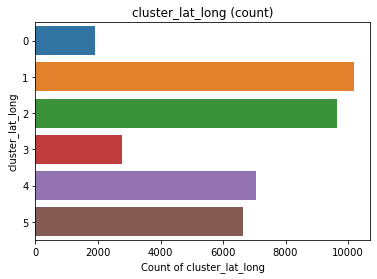

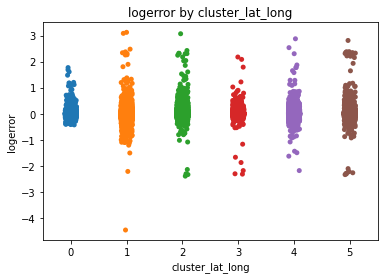

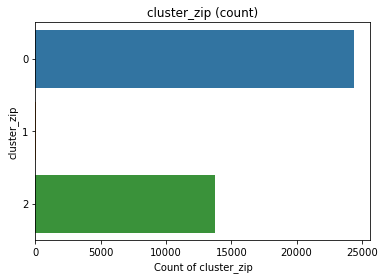

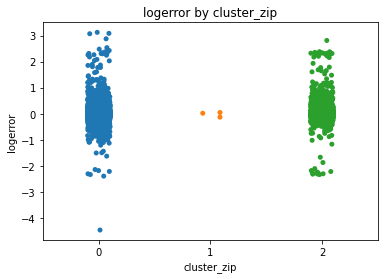

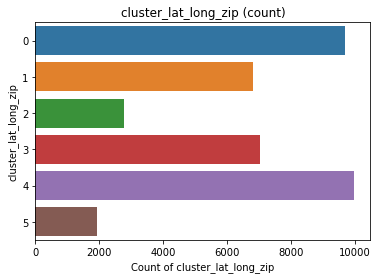

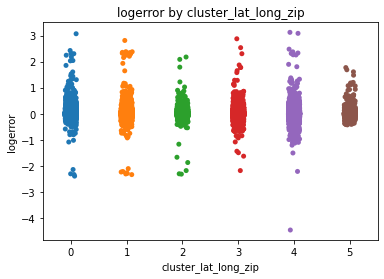

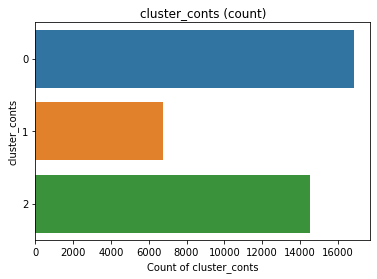

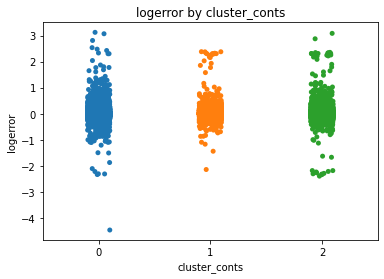

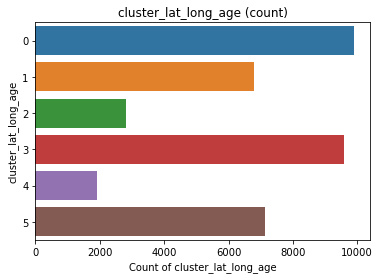

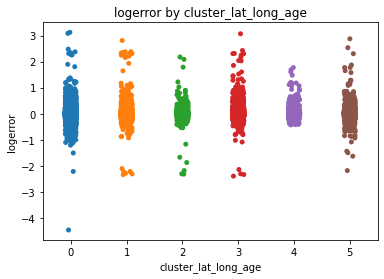

In [45]:
e.cat_visuals(train, cluster_cats, target)

## Let's do a t-test on all of our clusters independently to see if any of them are more useful than another

In [46]:
train.cluster_conts.value_counts()

0    16883
2    14557
1     6752
Name: cluster_conts, dtype: int64

In [47]:
from scipy import stats
def run_ttest(subset):
    print('---')
    t, p = stats.ttest_1samp(subset.logerror, overall_logerror_mean)
    print(f'{subset.shape}')
    print(f'{subset.logerror.isna().sum()}')
    return t, p

overall_logerror_mean = train.logerror.mean()
train.groupby('cluster_lat_long').apply(run_ttest)

---
(1917, 21)
0
---
(10199, 21)
0
---
(9629, 21)
0
---
(2765, 21)
0
---
(7053, 21)
0
---
(6629, 21)
0


cluster_lat_long
0       (1.1501478268770016, 0.25022652164852155)
1    (-4.587122355969833, 4.5475524797160024e-06)
2    (3.7409322977806245, 0.00018440359915475115)
3       (0.35209218436146567, 0.7247959713553223)
4        (0.26906323657971976, 0.787888891800779)
5        (0.7945084386349254, 0.4269279447564005)
dtype: object